In [1]:
import numpy as np
import pandas as pd

import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('gapping/train.csv', sep = '\t')
dev = pd.read_csv('gapping/dev.csv', sep = '\t')

<b>Количество примеров в train'е и dev'е</b>

In [3]:
train.shape

(16406, 8)

In [4]:
dev.shape

(4142, 8)

<b>Проверка, что распределения train'а и dev'а совпадают</b>

In [5]:
train['class'].value_counts()

0    10864
1     5542
Name: class, dtype: int64

In [6]:
dev['class'].value_counts()

0    2760
1    1382
Name: class, dtype: int64

In [7]:
train['class'].value_counts()[0] / train['class'].value_counts().sum()

0.6621967572839205

In [8]:
dev['class'].value_counts()[0] / dev['class'].value_counts().sum()

0.6663447609850314

<b>Сравниваем длины текстов в train'е и dev'е: видно, что разбиение честное</b>

In [9]:
train['lenc'] = train['text'].apply(len)
dev['lenc'] = dev['text'].apply(len)
train['lenw'] = train['text'].apply(lambda x: len(x.split(' ')))
dev['lenw'] = dev['text'].apply(lambda x: len(x.split(' ')))

In [10]:
train['lenc'].describe()

count    16406.000000
mean       151.015482
std        102.031582
min         12.000000
25%         84.000000
50%        128.000000
75%        189.000000
max       1138.000000
Name: lenc, dtype: float64

In [11]:
dev['lenc'].describe()

count    4142.000000
mean      152.647030
std       103.435783
min        10.000000
25%        85.000000
50%       130.000000
75%       190.000000
max      1008.000000
Name: lenc, dtype: float64

In [12]:
train['lenw'].describe()

count    16406.000000
mean        21.150067
std         12.905288
min          1.000000
25%         13.000000
50%         18.000000
75%         26.000000
max        146.000000
Name: lenw, dtype: float64

In [13]:
dev['lenw'].describe()

count    4142.000000
mean       21.241912
std        12.964626
min         2.000000
25%        13.000000
50%        18.000000
75%        26.000000
max       149.000000
Name: lenw, dtype: float64

In [14]:
train[train['lenw'] < 3]['class'].value_counts()

0    3
Name: class, dtype: int64

In [15]:
train_len_pos = []

for i in range(3, 50):
    vs = train[train['lenw'] == i]['class'].value_counts()
    train_len_pos.append(1 - (vs[0] / vs.sum()))

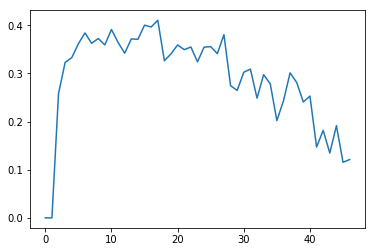

In [16]:
plt.plot(train_len_pos)

In [17]:
dev_len_pos = []

for i in range(3, 50):
    vs = dev[dev['lenw'] == i]['class'].value_counts()
    dev_len_pos.append(1 - (vs[0] / vs.sum()))

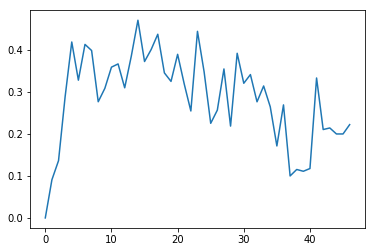

In [18]:
plt.plot(dev_len_pos)

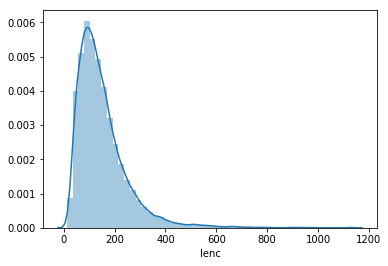

In [19]:
sns.distplot(train['lenc']);

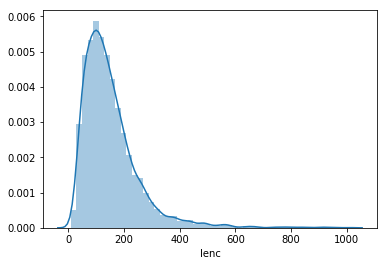

In [20]:
sns.distplot(dev['lenc']);

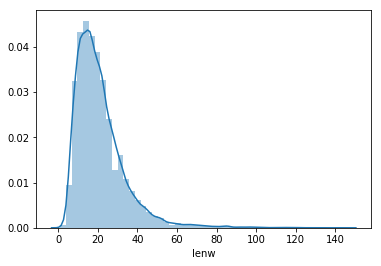

In [21]:
sns.distplot(train['lenw']);

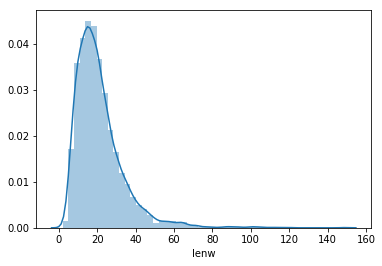

In [22]:
sns.distplot(dev['lenw']);

In [23]:
train.iloc[1]

text     Работа с двухбайтовыми наборами символов — про...
class                                                    1
cV                                                   92:99
cR1                                                  83:91
cR2                                                103:109
V                                                  127:127
R1                                                 119:124
R2                                                 127:134
lenc                                                   135
lenw                                                    23
Name: 1, dtype: object

In [24]:
# идеи: посмотреть, как "дела" с тире: какая точность при наличии тире
# посмотреть, есть ли baselines; если нет, написать организаторам по поводу baselin'ов
# можно ли решать только часть задач: можно ли обнаруживать только глагол; не привязывать аргументы
pd.set_option('max_colwidth', 1000)

In [25]:
train[train['class'] == 1].sample(50)

,text,class,cV,cR1,cR2,V,R1,R2,lenc,lenw
4986,"Во Франции и Соединенных Штатах корова приходится примерно на 5 душ населения, в Германии - на 6 душ, в Советском Союзе на 8 душ; по молочности же две советские коровы должны считаться, примерно, за одну.",1,39:49,0:31,50:77,92:92 120:120,79:89 102:119,92:100 120:128,204,35
7508,"В явлениях погоды ветер соответствует дереву, тепло - огню, влажность - земле, сухость - металлу и холод - воде.",1,24:37,18:23,38:44,54:54 72:72 89:89 107:107,46:51 60:69 79:86 99:104,54:58 72:77 89:96 107:111,112,19
1063,"На боковых частях элемента у его бортов выполнены Т-образные окончания, а у протектора - ограниченные с двух сторон вырубленными отверстиями прорези для заведения с поворотом на 90° при соединении элементов Т-образных окончаний в прорези.",1,40:49,0:39,50:70,89:89,74:86,89:237,238,34
12323,"На mademoiselle Беллуа было возложено наблюдение за ручной кладью, пару силихэм-терьеров поручили одной горничной, пару китайских мопсов — другой.",1,89:97,67:88,98:103,139:139,115:136,139:145,146,19
1662,"Для Firefox вам нужно загрузить расширение Web Developer (https://addons.mozilla.org/en-US/firefox/addon/60), а для Internet Explorer — панепь Developer Toolbar, которую можно скачать с сайта Microsoft.",1,16:21,0:11,32:108,136:136,112:133,136:201,202,23
13694,"Позвольте напомнить членам Ассамблеи о том, что в соответствии с решением 34/401 Генеральной Ассамблеи первое выступление в порядке осуществления права на ответ ограничивается десятью минутами, а второе - пятью минутами и что выступления осуществляются делегациями с места.",1,161:175,103:121,176:192,205:205,196:202,205:219,273,37
918,"Как и в большинстве московских музеев, в Музее искусства народов Востока есть большое кафе, а при кафе – туалеты.",1,73:77,39:72,78:90,105:105,94:102,105:112,113,19
4611,"Тем не менее в 2000 году было вывезено продукции на 3,2 млн долларов США, причем около 60% экспорта было осуществлено в страны СНГ и 40% - в страны дальнего зарубежья.",1,105:117,81:99,118:130,139:139,133:136,139:166,167,30
4271,"Стретчинг или растяжка - это комплекс упражнений на растяжку, которые делают ваши мышцы более эластичными, а суставы подвижными и гибкими.",1,70:76,77:87,88:105,117:117,109:116,117:137,138,20
9478,"Пища сделалась ее ностальгической потребностью, ее гордостью, а процесс питания и приготовление еды — единственным воплощением творческих сил.",1,5:14,0:4,15:60,102:102,64:99,102:141,142,18


In [26]:
train.sample(50)

,text,class,cV,cR1,cR2,V,R1,R2,lenc,lenw
3073,"В составе средства - спирт этиловый, глицерин, лимонная кислота, отдушка,вода; в качестве растительных экстрактов в состав введены водно-спиртовые экстракты полыни горькой, хвоща, хвои, коры дуба, подорожника, а также в состав дополнительно введен ментол",0,NaN,NaN,NaN,NaN,NaN,NaN,254,33
2414,"Перекос необработанных торцов не должен превышать 2 мм, а фрезерованных - 1 мм при измерении в любом направлении.",1,33:39,8:29,50:54,74:74,58:71,74:112,113,18
8487,"Акции «НОВАТЭКа» котируются на фондовой бирже Российская Торговая Система (РТС), Глобальные Депозитарные Расписки - на Лондонской фондовой бирже (LSE) под символом ""NVTK"" и в системе NASDAQ PORTAL в соответствии с правилом 144А ГДР под символом ""NVATY",0,NaN,NaN,NaN,NaN,NaN,NaN,251,36
12163,"Использование: в композиционных фрикционных изделиях, применяющихся в тормозных фрикционных механизмах, преимущественно работающих в тяжелых условиях",0,NaN,NaN,NaN,NaN,NaN,NaN,149,15
690,"Кроме того, она присоединяется к предложениям и рекомендациям, содержащимся в докладе Специального комитета (А/53/127), и поддерживает их скорейшее осуществление",0,NaN,NaN,NaN,NaN,NaN,NaN,161,19
623,"Влияние объекта на окружающую среду, комплекс мер по минимизации влияния: в соответствии с Заданием на проектирование разработаны разделы ОВОС, ООС",0,NaN,NaN,NaN,NaN,NaN,NaN,147,20
5441,"Его правительство считает такую помощь важной с точки зрения концепции безопасности человека, в которой основной упор делается на защиту и расширение прав и возможностей людей",0,NaN,NaN,NaN,NaN,NaN,NaN,175,25
11044,"Однако, одни лишь фотографии не могут рассказать обо всем",0,NaN,NaN,NaN,NaN,NaN,NaN,57,9
10135,"Миром правит любовь, а войною - глупцы.",1,6:12,0:5,13:19,32:32,23:29,32:38,39,7
7455,"Австралия, Австрия, Албания, Андорра, Аргентина, Афганистан, Бангладеш, Бельгия, Болгария, Босния и Герцеговина, бывшая югославская Республика Македония, Венгрия, Гаити, Гватемала, Гвинея, Германия, Гондурас, Греция, Грузия, Дания, Ирландия, Исландия, Испания, Италия, Казахстан, Камбоджа, Канада, Кипр, Колумбия, Коста-Рика, Куба, Кувейт, Латвия, Литва, Лихтенштейн, Люксембург, Малайзия, Мали, Мальта, Мексика, Монако, Нидерланды, Никарагуа, Новая Зеландия, Норвегия, Перу, Польша, Португалия, Республика Корея, Республика Молдова, Российская Федерация, Румыния, Самоа, Сан-Марино, Сенегал, Сербия, Словакия, Словения, Соединенное Королевство Великобритании и Северной Ирландии, Соединенные Штаты Америки, Сомали, Судан, Сьерра-Леоне, Таиланд, Тринидад и Тобаго, Турция, Узбекистан, Украина, Уругвай, Фиджи, Филиппины, Финляндия, Франция, Хорватия, Черногория, Чешская Республика, Чили, Швеция, Эквадор, Эстония и Япония: проект резолюции",0,NaN,NaN,NaN,NaN,NaN,NaN,940,103


<b>Посчитаем количество слов в train'е, чтобы проверить, оправдан ли подход "замены слова"</b>

In [27]:
def symb_cv(row):
    if row['class'] == 0:
        return '-1'
    tmp = row['cV']
    lst = row['cV'].split(':')
    start = int(lst[0])
    end = int(lst[1])
    return row['text'][start:end]

In [28]:
train[train['class'] == 1].apply(symb_cv, axis = 1).apply(lambda x: len(x.split(' '))).value_counts()

1    5524
2      18
dtype: int64

<b>Посмотрим подробнее: оказывается, что это - ошибки разметки; только 2 примера - действительно гэппинг с двумя словами (следуют в)</b>

In [29]:
train[train['class'] == 1][train[train['class'] == 1].apply(symb_cv, axis = 1).apply(lambda x: len(x.split(' '))) == 2]

,text,class,cV,cR1,cR2,V,R1,R2,lenc,lenw
1237,"Учитель, я хочу путешествовать. Но одна часть меня хочет отправиться на запад, а другая на восток. Как мне быть?",1,52:57,36:51,70:78,89:89,82:88,89:98,112,19
2297,"Бог становится просто чит-кодом, позволяющим мне прожить жизнь с минимальными потерями, храм — лишь местом продажи...",1,5:15,1:4,16:87,96:96,89:93,96:115,117,16
4778,"Планы на год составляй весной, планы на день — утром.",1,14:23,1:13,24:30,48:48,32:45,48:53,53,10
5273,"Люди будут дороже чистого золота, и мужи — дороже золота Офирского.",1,6:11,1:5,12:33,44:44,37:41,44:67,67,11
5345,"Еще один немаловажный момент: за счет уменьшения преподавательской нагрузки (600 часов в год вместо 720-900) предполагается, что студенты больше времени будут уделять самостоятельной работе, а преподаватели — научной деятельности и развитию.",1,160:167,130:138,168:190,210:210,194:207,210:241,242,32
6301,"На двух пограничных пунктах пропуска - Донецк"" и ""Матвеев Курган"" в установленном порядке завершено таможенное оформление грузов, все автомобили пересекли границу. Часть из них следует в Донецк, другая - в Луганск"", - сказал Воронов.",1,179:186,166:178,187:195,206:206,197:203,206:215,233,34
7961,"На двух пограничных пунктах пропуска — Донецк"" и ""Матвеев Курган"" — в установленном порядке завершено таможенное оформление грузов, все автомобили пересекли границу. Часть из них следует в Донецк, другая — в Луганск"", — сказал Воронов.",1,181:188,168:173,189:197,208:208,199:205,208:217,235,35
8400,"Вы идите в жопу, а я домой.",1,4:9,1:3,10:16,22:22,20:21,22:27,27,7
9672,"Христос стучится в сердце, а диавол — в мозги.",1,9:17,1:8,18:26,39:39,30:36,39:46,46,9
10115,"Порошенко своим указом наградил орденами Немцова посмертно, и Дурицкую - предсмертно...",1,24:32,42:49,50:59,74:74,63:71,74:85,87,11


In [30]:
train[train['class'] == 1][train[train['class'] == 1].apply(symb_cv, axis = 1).apply(lambda x: len(x.split(' '))) == 2].apply(symb_cv, axis = 1)

1237          очет 
2297     тановится 
4778      оставляй 
5273          удут 
5345        делять 
6301        едует в
7961        едует в
8400          дите 
9672       тучится 
10115      аградил 
10398        танет 
11680         меет 
13047      риведет 
13747        юбила 
13787        рощай 
14008       ажется 
14952        ивешь 
16321         меет 
dtype: object

<b>Видна структура ошибок разметки. Часть разметок сместилась на одну позицию (вправо).

Исправить ошибки в разметке? Скорее всего, сообщить о них организаторам, ведь часть из ошибок наверняка попала и в тест.</b>

------------------------------------------------------------------------------------------------------------------------
<b>Посмотрим, по сколько раз в предложениях датасета опускается гэппинг</b>

In [31]:
train[train['class'] == 1]['V'].apply(lambda x: x.count(':')).value_counts()

1    5173
2     315
3      45
4       7
5       2
Name: V, dtype: int64

<b>Проверка гэппинга на части речи</b>

In [42]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [64]:
morph.parse('ратифицирована'.lower())

[Parse(word='ратифицирована', tag=OpencorporaTag('PRTS,impf,past,pssv femn,sing'), normal_form='ратифицировать', score=0.5, methods_stack=((<DictionaryAnalyzer>, 'ратифицирована', 75, 200),)),
 Parse(word='ратифицирована', tag=OpencorporaTag('PRTS,perf,past,pssv femn,sing'), normal_form='ратифицировать', score=0.5, methods_stack=((<DictionaryAnalyzer>, 'ратифицирована', 75, 204),))]

In [32]:
from nltk.tag import pos_tag

In [58]:
train['pos'] = train[train['class'] == 1].apply(symb_cv, axis = 1).apply(lambda x: morph.parse(x.lower())[0].tag.POS)

In [59]:
train['pos'].value_counts()

VERB    4633
PRTS     450
ADJS     152
INFN      81
PRED      81
GRND      74
CONJ      28
INTJ      17
NOUN       7
ADVB       1
Name: pos, dtype: int64

In [60]:
train['Cv_word'] = train.apply(symb_cv, axis = 1)

In [65]:
train[train['pos'] == 'PRTS']['Cv_word']

8          ратифицирована
43               увеличен
98               приделан
160             закреплен
169              выпущено
229            рассмотрен
241               связана
352              отмечены
359               связано
438             разрешено
458             подключен
572              нацелено
619         предназначена
626              выделено
762               связаны
765           установлены
784            обусловлен
797           исследована
883               сделана
886               обязана
943              выполнен
955             погребены
979           подсоединен
1012            объяснено
1063            выполнены
1104             заменены
1134     зарегистрировано
1183              введены
1194             назначен
1201             отложены
               ...       
15591            отмечены
15592           утвержден
15609              создан
15613          подключены
15646         установлены
15688           выполнены
15691            соединен
15692       

In [66]:
train[train['pos'] == 'ADJS']['Cv_word']

339         разбита
507       вооружены
668          должно
680          должна
683        вооружен
693          должен
972          должен
1173         должна
1202         писана
1296         должна
1403         занята
1451     установлен
1487          одето
1649     необходимо
1770         должен
1804         заняты
2092         должна
2237         должны
2298         должна
2414         должен
2547         должно
2748         должны
3052         должен
3069        Заменим
3088         должно
3229         должна
3439         служил
3473         должна
3478     установлен
3521         должны
            ...    
13258        должны
13324        должна
13504        должны
13714        должны
13720        занята
13786        должна
13857       окружен
13936        должны
14221        избран
14275       признан
14436        избран
14514        должны
14555        указан
14560        должен
14564       склонен
14689        должны
14831        должна
15085        должен
15189        избран
